# 组合投资理论基础

## 单期，多期收益率，连续复利

https://zhuanlan.zhihu.com/p/514862524

https://www.zhihu.com/column/c_1335724136769540096

如果把一段时间内每一期的资产价格按照时间先后顺序排列起来，将得到资产价格的时间序列。第一期为P1，后续为P2等。假设投资者在t-1时投某资产，投入价格为Pt-1，持有一期后以Pt的价格卖掉。不考虑交易成本，其单期收益率Rt的计算公式为：

<img src=https://pic2.zhimg.com/80/v2-00bdd267e1dccaa97fcc824efbe5b1ed_720w.webp width=30% />


* 多期简单收益率

根据上面公式，二期的单期收益率Rt(2)为：

<img src=https://pic3.zhimg.com/80/v2-785ad915adbdf911c319e8d2d25fc126_720w.webp width=30% />

推导下来，多期简单收益率则为：

若投资者在t-k期以价格Pt-k买入该资产，在t期卖出，则k期单期收益率Rt(k)为：

<img src=https://pic3.zhimg.com/80/v2-1aff916f31ddc34c724eea356650fb06_720w.webp width=30% />



* 单期与多期简单收益率的关系

以两期的简单收益率为例，可以将其分解为两个单期简单收益率的乘积的形式。
<img src=https://pic1.zhimg.com/80/v2-0d70aca1f732fc7dfbfc68d3f0148c60_720w.webp width=30% />

其中 （1+Rt）*(1+Rt-1) 的概念就是复利。

* 平均收益率

而如果不考虑复利，也就是说每一期获得的收益都没有再投入资产中的收益就是简单的单期收益加总。

$$ R_t(k)=\sum_{j=0}^{k-1}{R_{t-j}} $$ 

如果只知道多期收益，要计算单期收益率的平均值，并且不考虑复利，那么公式为：

$$ 算术平均收益率=\frac{R_t(k)}{k}=\frac{\sum_{j=0}^{k-1}{R_{t-j}}}{k} $$

如果只知道多期收益，要计算单期收益率的平均值，并且考虑复利，那么公式为：

$$ 几何平均收益率 = \sqrt[k]{R_t(k)+1}-1=\sqrt[k]{\prod_{j=0}^{k-1}(1+R_{t-j})}-1 $$

* 七日年化

七日年化收益率是货币基金最近7日的平均收益水平，进行年化以后得出的数据；7日年化收益率上显示的收益率是年化收益率，也就是说投资这款理财产品一年可以获得的收益。

* 连续复利收益率

单期与多期连续复利收益率的关系
我们以两期连续复利收益率为例，两期连续复利收益率等于前一天和当天的单期复利收益

率之和。进而推知，k期连续复利收益率为k天的单期连续复利收益率之和。这体现了连续

复利收益率的优良性质：单期加总得到多期。
<img src=https://pic4.zhimg.com/80/v2-da9072b4cb2dc03a8a8985cf50167e37_720w.webp width=30% />

In [ ]:
(r2+1)**(1/n)-1=r

## classwork1（收益率的计算）

1, 导入中国平安"000001" 从日期"20200301"到'20230207'的收盘价

2，以1天为一期，分别计算第一第二天的单期收益率，及其二期收益率，比较二期收益率与第一第二的单期收益率的关系



In [1]:
import akshare as ak
import pandas as pd
import numpy as np

In [2]:
stock_pinan = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20200301", end_date='20230207', adjust="")["收盘"]

## classwork2（多期收益率连续复利计算）

1，计算最开始的七日收益率，并基于此计算七日年化收益率

2，计算第一第二天的单期连续复利，计算二期连续复利，比较两者之间的关系

3, 1天为期，计算所有期的单期收益率和所有期的连续复利,并可视化

<AxesSubplot:>

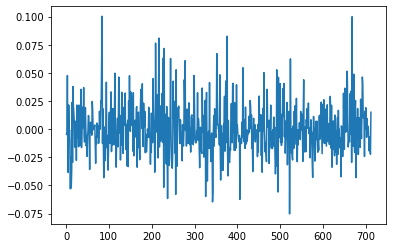

In [27]:
(stock_pinan/stock_pinan.shift(1)-1).plot()

<AxesSubplot:>

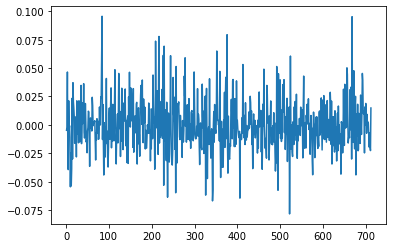

In [28]:
np.log(stock_pinan/stock_pinan.shift(1)).plot()

In [19]:
#(stock_pinan[7]/stock_pinan[0]-1)**(1/7)

# 资产风险的测度


## 风险与方差

Markowitz首先提出来用方差来度量风险。单个资产的风险具体可以表达为：

$$ \sigma^2(R)=E\{[R-E(R)]^2\} $$

其中，R是所有可能发生的（或者已经实现的）收益率（随机变量），E（R）表示预期收益率。若收益率R是离散分布，则：

$$ \sigma^2(R)=\sum_{K}{p_k[R_k-E(R)]} $$

方差风险度量法观念简单，容易理解，但是也有一些弊端。比如这一定义偏离了风险的本意，风险往往认为是潜在的损失，而方差是一个中性的概念，只有向下的波动才和风险本义相契合，向上的波动反而会让投资者获益，无法反应风险的经济性质。并且Markowitz在构建均值-方差投资组合时，将收益率看成服从正态分布，这是一个重要假设，这样才能忽略收益率的偏度和峰度等统计特性，只需考虑均值、方差即可，但实际上很多产品的收益率是不满足正态分布的，具有明显的偏度和峰度，继续使用方差度量风险可能会带来较大的误差。

In [4]:
r=stock_pinan.shift(1)/stock_pinan-1

<AxesSubplot:>

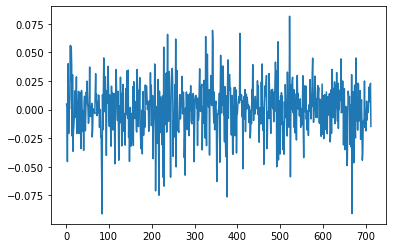

In [5]:
r.plot()

In [17]:
((r-r.mean())**2).mean()**0.5

0.022092094022788313

In [20]:
((r-r.mean())**2).mean()

0.0004880606183117191

In [18]:
r.var()

0.0004887470608128608

In [19]:
r.std()

0.022107624495021187

## 下行风险

在Markowitz之后，Roy于1952年提出了用下行偏差（Downside Deviation）来度量风险的办法。下行偏差法和方差法类似，不过更贴近现实中投资者对风险的理解（只考虑低于目标收益率的变动）。计算下行偏差时，一个最重要的变量就是目标收益率，通常用可接受的最低收益率（Minimum Acceptable Rate of Return，MARR）来表示，MARR可以是无风险利率或者0，或者资产收益率的平均值。下行偏差描述的是低于MARR的收益率的发散程度，总体的下行偏差公式如下：

$$ \delta（R, MARR）=\sqrt{E\{[min(R-MARR,0)]^2\}} $$
若我们有R1，R2，...，RT作为R的随即样本，则样本额下行偏差为：

$$ \delta（R, MARR）=\sqrt{\frac{1}{T}\sum_{t=1}^{T}\{[min(R-MARR,0)]^2\}} $$

用下行偏差描述的风险称为下行风险（Downside Risk）

In [25]:
(r[r<r.mean()]**2).sum()/len(r)

0.00026052540201265304

## 最大回撤

实务上经常会用最大回撤（Maximum Drawdown，MDD）来衡量投资（特别是基金，股票投资组合）的表现，在介绍最大回撤前，我们先来了解下什么是回撤。某资产（或投资组合）在时刻T的回撤是指资产在（0，T）的最高峰值与现在价格 
 之间的回落值，用数学公式表达为：
 
$$ D(T)=max\{0,max_{t\in(0,T)}\{P_t-P_T\}\} $$
 
 对应的回撤率为：
 
$$ d(T)=\frac{D(T)}{max_{t\in(0,T)}P_t} $$
 
知晓回撤的含义，最大回撤就比较好理解了，资产在T时刻的最大回撤就是资产在（0，T）时段内回撤的最大值。直观地说就是这一时段内，资产价值从最高峰回落到最低谷的幅度。最大回撤通常用来描述投资者在持有资产时可能面临的最大亏损。

## classwork3(风险的计算)

* 求中国平安从日期"20200301"到'20230207'的风险，下行风险，回测，回测率，最大回测

* 在页面上实现选择不同的股票的不同时间段，自动计算以上量

# 组合投资的收益与风险


https://zhuanlan.zhihu.com/p/361234664

* 收益是有不确定性的

* 收益越高不确定性越大

## 投资组合的收益率

在拓展到N中风险资产之前，先来看两种资产的情况。假设现在市场有资产A和资产B，其随机收益率分别为 
$R_A$和$R_B$,若投资人将其财富的一部分投入资产A，剩下的全部投入资产B，投资比例分别为$\omega_A$和$\omega_B$
我们就可以求得投资组合的收益率  ，就是总收益除以初始资本

$$ R_p = {\omega_AR_A+\omega_BR_B} $$
$$\omega_A+\omega_B=1$$



In [63]:
0.1*0.2+0.2*0.8

0.18000000000000005

### akshare中多个股票数据的组合

In [2]:
stock_set = ['000413','000063','002007',"000001","000002"]

#000413 东旭光电，000063 中兴通讯，002007 华兰生物，000001 平安银行，000002 万科A
#https://zhuanlan.zhihu.com/p/20604930?refer=quantstory

In [3]:
p0=ak.stock_zh_a_hist(symbol="000413", period="daily", start_date="20210201", end_date='20230201', 
                     adjust="hfq")[["日期","收盘"]]
p0.set_index("日期",inplace=True)

for i in stock_set[1:]:
    p1=ak.stock_zh_a_hist(symbol=i, period="daily", start_date="20210201", end_date='20230201', 
                     adjust="hfq")[["日期","收盘"]]
    p1.set_index("日期",inplace=True)
    p0=pd.concat([p0,p1],axis=1)

p0.columns=stock_set
p0=p0.fillna(method="ffill")

In [4]:
p0

,000413,000063,002007,000001,000002
日期,,,,,
2021-02-01,7.09,437.28,1251.42,4129.64,4464.71
2021-02-02,7.12,429.46,1276.79,3923.23,4500.06
2021-02-03,7.00,432.33,1252.20,4194.65,4445.07
2021-02-04,6.55,426.46,1234.60,4137.77,4441.15
2021-02-05,6.61,418.63,1336.31,4191.40,4570.75
...,...,...,...,...,...
2023-01-19,6.73,371.94,663.21,2658.44,3509.87
2023-01-20,6.79,379.11,655.70,2664.95,3513.80
2023-01-30,6.85,374.55,642.76,2668.20,3449.65


In [81]:
#help(p0.fillna)

In [8]:
p0

,000413,000063,002007,000001,000002
日期,,,,,
2021-02-01,7.09,437.28,1251.42,4129.64,4464.71
2021-02-02,7.12,429.46,1276.79,3923.23,4500.06
2021-02-03,7.00,432.33,1252.20,4194.65,4445.07
2021-02-04,6.55,426.46,1234.60,4137.77,4441.15
2021-02-05,6.61,418.63,1336.31,4191.40,4570.75
...,...,...,...,...,...
2023-01-19,6.73,371.94,663.21,2658.44,3509.87
2023-01-20,6.79,379.11,655.70,2664.95,3513.80
2023-01-30,6.85,374.55,642.76,2668.20,3449.65


### classwork4（编程计算组合收益）

1， 求这些股票每天的单期收益率与单期连续收益率

2， 已知投资权重为[0.2,0.3,0.2,0.2,0.1], 求此权重下每天的组合收益率(np.dot，点乘的机制)

3， 此投资组合下最终的收益率和连续收益率是多少？

In [13]:
w1=np.array([0.2,0.3,0.2,0.2,0.1])

In [15]:
0.2*0.004231+0.3*(-0.017883)+0.2*0.020273+0.2*(-0.049983)+0.1*0.007918

-0.0096689

In [17]:
r_n=np.dot(r,w1)

In [14]:
r

,000413,000063,002007,000001,000002
日期,,,,,
2021-02-02,0.004231,-0.017883,0.020273,-0.049983,0.007918
2021-02-03,-0.016854,0.006683,-0.019259,0.069183,-0.012220
2021-02-04,-0.064286,-0.013578,-0.014055,-0.013560,-0.000882
2021-02-05,0.009160,-0.018360,0.082383,0.012961,0.029182
2021-02-08,-0.018154,0.000932,0.010065,-0.005039,0.007159
...,...,...,...,...,...
2023-01-19,0.004478,0.000350,0.006297,-0.001221,0.002617
2023-01-20,0.008915,0.019277,-0.011324,0.002449,0.001120
2023-01-30,0.008837,-0.012028,-0.019735,0.001220,-0.018257


In [11]:
r_log=np.log(p0/p0.shift(1)).dropna()

In [12]:
r_log

,000413,000063,002007,000001,000002
日期,,,,,
2021-02-02,0.004222,-0.018045,0.020070,-0.051275,0.007886
2021-02-03,-0.016998,0.006661,-0.019447,0.066895,-0.012295
2021-02-04,-0.066445,-0.013671,-0.014155,-0.013653,-0.000882
2021-02-05,0.009119,-0.018531,0.079165,0.012878,0.028764
2021-02-08,-0.018321,0.000931,0.010015,-0.005052,0.007133
...,...,...,...,...,...
2023-01-19,0.004468,0.000350,0.006277,-0.001222,0.002613
2023-01-20,0.008876,0.019094,-0.011388,0.002446,0.001119
2023-01-30,0.008798,-0.012101,-0.019932,0.001219,-0.018425


In [62]:
r=(p0/p0.shift(1)-1).dropna()
r_log=np.log(p0/p0.shift(1)).dropna()

In [64]:
r_n=np.dot(r,np.array([0.2,0.3,0.2,0.2,0.1]))

In [16]:
weight=np.array([0.2,0.3,0.2,0.2,0.1])

In [66]:
r_n.std()

0.012715105464818532

In [1]:
#np.dot((p/p.shift(1)-1),np.array([0.2,0.3,0.2,0.2,0.1]))

In [2]:
#np.dot(weight.T,(p/p.shift(1)-1).values)

In [62]:
(np.log(p)-np.log(p.shift(1))).sum()

000413   -0.025716
000063   -0.158173
002007   -0.677197
000001   -0.464581
000002   -0.254144
dtype: float64

In [66]:
p

,000413,000063,002007,000001,000002
日期,,,,,
2021-02-01,7.09,437.28,1251.42,4129.64,4464.71
2021-02-02,7.12,429.46,1276.79,3923.23,4500.06
2021-02-03,7.00,432.33,1252.20,4194.65,4445.07
2021-02-04,6.55,426.46,1234.60,4137.77,4441.15
2021-02-05,6.61,418.63,1336.31,4191.40,4570.75
...,...,...,...,...,...
2023-01-19,6.73,371.94,663.21,2658.44,3509.87
2023-01-20,6.79,379.11,655.70,2664.95,3513.80
2023-01-30,6.85,374.55,642.76,2668.20,3449.65


In [72]:
np.log(p.tail(1).values)-np.log(p.head(1).values)

array([[-0.0257157 , -0.15589021, -0.67719732, -0.4645806 , -0.25414408]])

## 投资组合的风险

资产风险的衡量我们上一节讲过了，这里我们还沿用收益率的方差来指代风险。单个资产收益率的方差为：

$$ \sigma^2(R_i)=E\{[R_i-E(R_i)]^2\ $$

两个资产组成的投资组合的方差为：

$$ \sigma^2(R_p)=E\{[R_p-E(R_p)]^2\} $$

$$ =E\{[\omega_AR_A+\omega_BR_B-E(\omega_AR_A+\omega_BR_B)]^2\} $$

$$ =E\{\{\omega_A[R_A-E(R_A)])+\omega_B[R_B-E(R_B)]\}^2\} $$

$$ =E\{\omega^2_A[R_A-E(R_A)]^2)+\omega^2_B[R_B-E(R_B)]^2+2\omega_A\omega_B[R_A-E(R_A)][R_B-E(R_B)]\} $$

$$ =\omega^2_A\sigma^2(R_A)+\omega^2_B\sigma^2(R_B)+2\omega_A\omega_B\sigma(R_A,R_B) $$

其中 $ \sigma(R_A,R_B) $为资产A与资产B的协方差，也可以写作 $ Cov（R_A,R_B）$ 
$$ Cov(R_A,R_B)=E\{[R_A-E(R_A)][R_B-E(R_B)]\} $$

从上式可以看出，如果资产A与资产B收益率变化趋势一致（你为正，我也为正），那么协方差为正；反之（我赚了，你赔了）则为负。所以协方差也就是描述两个变量有多大的“可能”朝一个方向改变，但是协方差会受比例影响，比如A扩大十倍收益率，B扩大十倍收益率，那么协方差会扩大100倍。还有就是相关系数，更能刻画两者的相关度。相关系数和协方差的关系如下关系式：

$$ \rho(A,B)=\frac{\sigma(R_A,R_B)}{\sigma(R_A)\sigma(R_B)} $$

当把两个投资组合推广到n个投资组合的时候，我们就得到了如下公式：

$$ \sigma^2(R_p)=\sigma^2(\sum_{i=1}^{N}{\omega_iR_i})=\sum_{i=1}^{N}{\omega_i^2\sigma^2(R_i)}+\sum_{i\ne j}{\omega_i\omega_j\sigma(R_i,R_j)} $$

In [38]:
r

,000413,000063,002007,000001,000002
日期,,,,,
2021-02-02,0.004231,-0.017883,0.020273,-0.049983,0.007918
2021-02-03,-0.016854,0.006683,-0.019259,0.069183,-0.012220
2021-02-04,-0.064286,-0.013578,-0.014055,-0.013560,-0.000882
2021-02-05,0.009160,-0.018360,0.082383,0.012961,0.029182
2021-02-08,-0.018154,0.000932,0.010065,-0.005039,0.007159
...,...,...,...,...,...
2023-01-19,0.004478,0.000350,0.006297,-0.001221,0.002617
2023-01-20,0.008915,0.019277,-0.011324,0.002449,0.001120
2023-01-30,0.008837,-0.012028,-0.019735,0.001220,-0.018257


In [40]:
np.dot(r,w1).std()

0.012715105464818532

In [51]:
for i in range(0,5):
    print(r.iloc[:,i].std())

0.017650297354124954
0.02023571339872403
0.023556216229635107
0.02082897428703604
0.01832756921980858


In [50]:
r.iloc[:,4].std()

0.01832756921980858

In [41]:
r.cov()

,000413,000063,002007,000001,000002
000413,0.000312,0.000079,0.000044,0.000037,0.000027
000063,0.000079,0.000409,0.000132,0.000122,0.000071
002007,0.000044,0.000132,0.000555,0.000094,0.000057
000001,0.000037,0.000122,0.000094,0.000434,0.000202
000002,0.000027,0.000071,0.000057,0.000202,0.000336


In [43]:
np.sqrt(np.dot(w1, np.dot(r.cov(), w1)))

0.012728343475134648

In [3]:
#r_n=np.dot((p/p.shift(1)-1),np.array([0.2,0.3,0.2,0.2,0.1]))

In [107]:
r_n[1:].std()

0.012715105464818532

In [110]:
(p/p.shift(1)-1).dropna().std()

000413    0.017650
000063    0.020236
002007    0.023556
000001    0.020829
000002    0.018328
dtype: float64

In [60]:
weight=np.array([0.2,0.3,0.2,0.2,0.1])

In [67]:
np.sqrt(np.dot(weight, np.dot(r.cov(), weight)))#协方差计算

0.012728343475134648

### classwork5（编程计算组合风险）

1， 求这些股票的组合风险（两种方法1，先求组合收益再求风险，2 直接通过协方差求）

2， 求这些股票单个风险，并与上题比较

3， 蒙特卡洛模拟，随机生成weight数据，并基于此计算此投资组合的此时间段的收益与风险

4,  在页面上实现输入不同的股票组合，生成股票组合的收益风险散点图

In [56]:
#随机生成投资组合的权重
weight_ram = np.random.random(len(stock_set))
weight_ram=weight_ram/np.sum(weight_ram)
weight_ram

array([0.08332207, 0.04651511, 0.24801942, 0.44767755, 0.17446585])

In [58]:
r_n_0.std()

0.012404593007410245

In [60]:
import matplotlib.pyplot as plt  

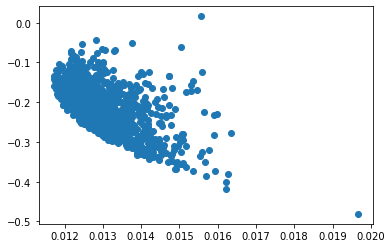

In [63]:
plt.plot(x,y,"o")

In [ ]:
002613,000063,002594,600519,600004

## 夏普比率与最佳投资组合

夏普比率（ Sharpe ratio），是指投资组合）在对其调整风险后，相对于无风险资产的表现。

它代表投资者额外承受的每一单位风险所获得的超额收益。对一个投资组合而言，夏普比率越高越好。
夏普比率 = (回报率 – 无风险利率)/标准差


假设目前投资一个预期回报率为12%，波动率（标准差）为10%的投资组合。无风险利率是5%。
夏普比率就是：

$$ (Ra−Rf)/ σa = (0.12−0.05) /0.1 = 0.7 $$

一般来说单纯买入并持有指数，例如持有标普500指数，夏普率大约在0.5左右，而经过资产配置后的投资组合，夏普率通常可以得到提升，如果是接近1，就是不错的策略，如果是1.5以上那就非常优秀了。

In [67]:
x=[]
y=[]
for i in range(1000):
    w0=np.random.random(len(stock_set))
    w0=w0/np.sum(w0)
    r_n_0=np.dot(r,w0)
    x.append(r_n_0.std())
    y.append(r_n_0.sum())

In [95]:
def xiapu(w0):
    w0=w0/np.sum(w0)
    r_n_0=np.dot(r_log,w0)
    return r_n_0.std()/r_n_0.sum()

In [82]:
w0

array([0.0733588 , 0.17491114, 0.31811647, 0.04787831, 0.38573529])

In [ ]:
np.sum(np.dot(r_log.dropna(),weights))

In [80]:
w0

array([0.0733588 , 0.17491114, 0.31811647, 0.04787831, 0.38573529])

In [90]:
xiapu(w0)

-0.03656299030214233

In [96]:
import scipy.optimize as sco

noa=len(stock_set)
#约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数
bnds = tuple((0,1) for x in range(noa))

#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。
opts = sco.minimize(xiapu, noa*[1./noa,], method = 'SLSQP', bounds = bnds, constraints = cons)

opts

     fun: -0.6826820984438616
     jac: array([-0.        ,  3.96290436, 17.87991556, 12.2497878 ,  6.68603487])
 message: 'Optimization terminated successfully'
    nfev: 42
     nit: 8
    njev: 7
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])

In [97]:
opts.x

array([1., 0., 0., 0., 0.])

In [99]:
w0=opts.x

In [100]:
w0=w0/np.sum(w0)
r_n_0=np.dot(r_log,w0)
print(r_n_0.std(),r_n_0.sum())

0.01755564992619949 -0.02571570276445901


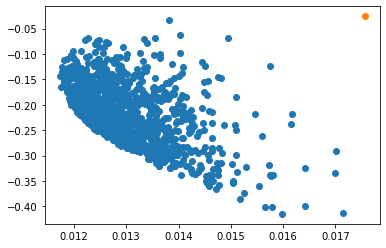

In [102]:
plt.plot(x,y,"o")
plt.plot([0.01755564992619949],[-0.02571570276445901],"o")

In [73]:
def min_sharpe(weights):
    
    weights = weights/np.sum(weights)
    z_r=np.sum(np.dot(r_log.dropna(),weights))
    z_f=np.sqrt(np.dot(weights, np.dot(r_log.dropna().cov(), weights)))

    return z_f/z_r#optimize是去最小值，所以这里用夏普率的倒数

In [86]:
def min_sharpe(weights):
    
    weights = weights/np.sum(weights)
    z_r=np.sum(np.dot(r_log,weights))
    z_f=np.sqrt(np.dot(weights, np.dot(r_log.cov(), weights)))

    return z_f/z_r#optimize是去最小值，所以这里用夏普率的倒数

In [87]:
min_sharpe(w0)

-0.03660105693431829

In [88]:
import scipy.optimize as sco

noa=len(stock_set)
#约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数
bnds = tuple((0,1) for x in range(noa))

#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。
opts = sco.minimize(min_sharpe, noa*[1./noa,], method = 'SLSQP', bounds = bnds, constraints = cons)

opts

     fun: -0.6833928556353901
     jac: array([-0.        ,  3.96703061, 17.89853101, 12.26254153,  6.69299625])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 9
    njev: 8
  status: 0
 success: True
       x: array([1.00000000e+00, 1.36657175e-13, 0.00000000e+00, 0.00000000e+00,
       5.67766337e-14])

In [49]:
w=np.array([1.00000000e+00, 1.36657175e-13, 0.00000000e+00, 0.00000000e+00,5.67766337e-14])

In [50]:
np.sum(np.dot(r_log.dropna(),w))

-0.025715702764494558

In [51]:
np.sqrt(np.dot(w, np.dot(r_log.dropna().cov(), w)))

0.017573927546898845

In [54]:
-0.025715702764494558/0.017573927546898845

-1.4632871733349349

In [55]:
-0.025715702764494558/0.012573927546898845

-2.045160723932827

In [70]:
"2233,9990".split(",")

['2233', '9990']

## classwork 6

* 在页面上实现选择不同的股票组合，显示最优夏普率的选择

### classwork 6

* 找一个组合收益为正的股票组合，看此时的最佳组合位置

* 如果使用下行风险代替风险，看看散点图有何变化

* 下行风险下的最优组合怎样计算？

## CAPM

https://zhuanlan.zhihu.com/p/366322544

在20世纪60年代，三位学者Sharpe（1964），Lintner（1965），Mossin（1966）在Markowitz模型框架下不约而同推导除了奠定现代投资学的经典模型：资本资产定价模型（Capital asset pricing model，CAPM）。三位学者经过严格的推导都得出以下结论：对于任意的资产组合，其收益率 满足以下关系式：

$$ E(R_q)-R_f=\beta_{qm}[E(R_m)-R_f] $$

该公式被称为传统的CAPM应模型，其中：Rm是市场投资组合之收益率，该组合是市场上所有风险资产的组合，包括股票等金融资产，也包括黄金等实物资产，在现实中构建这样的投资组合时不大可能实现的，因此在实务中常常以大盘指数来替代市场投资组合，根据大盘指数计算出来的收益率被看做Rm

$$ \beta_{qm}=\frac{\sigma(R_q,R_m)}{\sigma^2(R_m)} $$
为投资组合q的beta值，其中分母为资产组合收益率与市场投资组合收益率的协方差， 
分子为市场投资组合的方差，beta贝塔值反映出资产组合q的系统性风险；如果拟采用大盘指数来计算Rm，那么系统性风险那就是大盘的涨跌。


E(R_q)-R_f为风险投资组合q比无风险利率高出的期望收益率，高出来的部分是因为投资人在持有风险组合q时，承担了更多的风险，因此E(R_q)-R_f被称为风险溢价（Risk Premium）。

CAPM中的投资组合q可以是任意投资组合，也可以是单只股票，单只股票我们用小写i表示，那么就可以得到单只股票的CAPM公式
$$ E(R_q)=R_f+\beta_{qm}[E(R_m)-R_f] $$


其中的$\beta_{qm}$可以反映出单个资产的系统风险水平，若等于1，则资产i的价格和市场投资组合的价格波动性是一样的。如果小于1，则资产i的价格波动程度小于市场投资组合的；若大于1，则资产i的波动性更大。值为正就说明资产i的价格和市场投资组合价格变动同方向，反之则相反变动。

CAPM模型说明，单只股票的期望收益是无风险收益加上系统性风险溢价，非系统性风险可以通过分散化投资消除，所以没有对应的风险溢价。



CAPM公式中个股和大盘的收益率都是期望值，Jenson（1968）在研究共同基金表现时将CAPM模型写成如下形式：

$$ E(R_{it})-R_{ft}=\alpha_i+\beta_{i}[E(R_{mt})-R_{ft}]+\varepsilon_{it} $$

进行实证分析，$ R_{it},R_{ft},R_{mt}$
 对应的是个股i、无风险资产（通常是银行存款、国债）、市场指数（大盘指数）的收益率之时间序列资料，对这些资料进行线性回归分析，得到未知参数alpha和beta的估计值 
 。式子中的alpha是由Jenson引入的，所以又被称为Jenson's Alpha。根据CAPM模型之假设， 
 $ R_{it}$是服从正态分布的随机数，这样就可以判断 alpha和beta
 之统计显著性。 
 可以解释个股过去的收益率与风险之间的关系， 
 表示收益率胜过大盘的部分，通常也用来衡量基金经理的绩效。现在所有的投资者在做的事情都可以用一句话来概括，就是试图运用各种方法创造显著的正阿尔法。这些方法包括：基本面分析，消息面分析，技术面分析和阿尔法策略。

阿尔法策略的重点在于通过构建投资组合对冲掉系统风险，锁定alpha超额收益。若在有卖空机制的市场，对冲投资组合比较好构建。首先明确整个投资组合的资金，然后确定出具有较高alpha收益的、需要最多的证券组合和具有市场指数特征、用来对冲掉系统风险的、需要做空的证券组合，其次分配好资金的比重，最终获得稳定的Alpha收益率。另外也可以用证券和股指期货结合进行操作，比如投资者预测出未来会跑赢大盘的证券，则可以在证券市场将其买入，同时在期货市场卖空股指期货合约，以对冲系统性风险，这样市场的涨跌不会影响到投资组合的收益率。

### classwork6 

* 获取数据SHSE.000902（中证流通指数）与SHSE.600596（新安股份）的数据在2014-01-01到2014-12-31之间的数据

* 由于数据缺失，通过pd.merge基于时间连接数据，并计算对应的Rq Rm Rf，然后做出Rm-Rf 与Rq-Rf的散点图，另外无风险利率为一年期的国债利率，其年化为3.6%

* 通过sm.OLS函数进行线性拟合，并画出拟合结果

### akshare 指数历史行情数据
https://zhuanlan.zhihu.com/p/609079456

接口: index_zh_a_hist

目标地址: http://quote.eastmoney.com/center/hszs.html

描述: 东方财富网-中国股票指数-行情数据

限量: 单次返回具体指数指定 period 从 start_date 到 end_date 的之间的近期数据

输入参数

名称	类型	描述

symbol	str	symbol="399282"; 指数代码，此处不用市场标识

period	str	period="daily"; choice of {'daily', 'weekly', 'monthly'}

start_date	str	start_date="19700101"; 开始日期

end_date	str	end_date="22220101"; 结束时间

In [75]:
stock_xinan=ak.stock_zh_a_hist(symbol="600596", period="daily", start_date="20140101", end_date='20141231', 
                     adjust="hfq")[["日期","收盘"]]

In [76]:
index_zh = ak.index_zh_a_hist(symbol="000902", period="daily", start_date="20140101", 
                                        end_date='20141231')[["日期","收盘"]]

In [77]:
zh_xinan=pd.merge(index_zh,stock_xinan,on="日期",how="left").fillna(method="ffill")

In [39]:
import matplotlib.pyplot as plt 

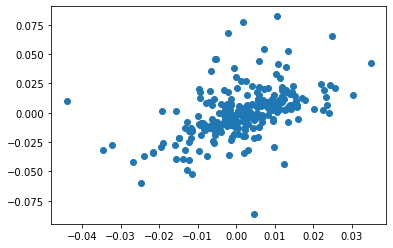

In [81]:
plt.plot(Rm,Rq,"o")

In [44]:
import statsmodels.api as sm

In [82]:
model = sm.OLS((Rq-Rf), sm.add_constant(Rm-Rf))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  xinan   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     76.82
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           3.36e-16
Time:                        22:04:15   Log-Likelihood:                 623.10
No. Observations:                 244   AIC:                            -1242.
Df Residuals:                     242   BIC:                            -1235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.001     -1.161      0.247      -0.004       0.001
zhongz         0.9527      0.109      8.765      0.000       0.739       1.167
==============================================================================
Omnibus:                       47.677   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.048
Skew:                           0.646   Prob(JB):                     6.74e-51
Kurtosis:                       7.589   Cond. No.                         89.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

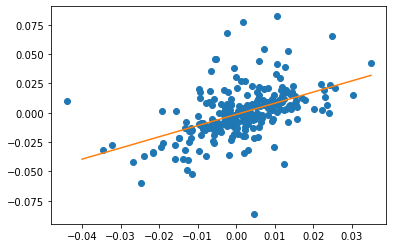

In [79]:
#ak.stock_zh_index_daily(symbol="sz399552")

In [77]:
pa=ak.stock_zh_a_hist(symbol="000902", period="daily", start_date="20210201", end_date='20230201', 
                     adjust="hfq")[["日期","收盘"]]
pa

,日期,收盘
0,2021-02-01,48.11
1,2021-02-02,48.13
2,2021-02-03,49.98
3,2021-02-04,51.01
4,2021-02-05,48.63
...,...,...
477,2023-01-19,32.72
478,2023-01-20,33.15
479,2023-01-30,33.20
480,2023-01-31,33.71


## 怎样看待这些投资理论